# DECISION TREE

## Imports

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

## Load data and initial setup

We will be seeing how well a decision tree regressor can do at predicting final score values based on the stats at the end of each quarter.

By separating the stats per quarter and not just including a sum total, I hope to capture the effects of momentum. For example, a team scored a ton in first q but by q3 is sucking is probably less likely to score high than a team that scored nothing in first q but in q2 and q3 really started to hit their stride.

We are assuming that given the entirety (q1,q2,q3,q4) of the game stats, the decision tree should be able to easily pick the correct amount of points, however, this is not guaranteed which is why I am doing a full game stats model.

In [98]:
df = pd.read_csv('compiledData/cleanedCompiledData.csv')
y = df['points']
X_q1 = df.filter(regex='q1$')
X_q1_q2 = df.filter(regex='q[12]$')
X_q1_q2_q3 = df.filter(regex='q[123]$')
X_q1_q2_q3_q4 = df.filter(regex='q[1234]$')

In [99]:
X_q1_train, X_q1_test, y_q1_train, y_q1_test = train_test_split(X_q1, y, test_size=0.2, shuffle=True)
X_q1_q2_train, X_q1_q2_test, y_q1_q2_train, y_q1_q2_test = train_test_split(X_q1_q2, y, test_size=0.2, shuffle=True)
X_q1_q2_q3_train, X_q1_q2_q3_test, y_q1_q2_q3_train, y_q1_q2_q3_test = train_test_split(X_q1_q2_q3, y, test_size=0.2, shuffle=True)
X_q1_q2_q3_q4_train, X_q1_q2_q3_q4_test, y_q1_q2_q3_q4_train, y_q1_q2_q3_q4_test = train_test_split(X_q1_q2_q3_q4, y, test_size=0.2, shuffle=True)

In [100]:
X_q1_train.columns

Index(['fourth_down_attempts_q1', 'num_of_defensive_penalties_q1',
       'num_of_defensive_penalty_yards_q1', 'num_of_fumbles_q1',
       'num_of_interceptions_caught_q1', 'num_of_interceptions_thrown_q1',
       'num_of_offensive_penalties_q1', 'num_of_offensive_penalty_yards_q1',
       'num_of_passes_attempted_q1', 'num_of_passes_completed_q1',
       'num_of_sacks_q1', 'num_of_times_sacked_q1', 'number_of_first_downs_q1',
       'number_of_successful_fourth_downs_q1',
       'number_of_successful_third_downs_q1', 'third_down_attempts_q1',
       'yards_allowed_q1', 'yards_moved_q1'],
      dtype='object')

## Decision Tree Experiments

In [101]:
def run_experiment(max_depth=None, verbose=True):
    q1_dt = DecisionTreeRegressor(max_depth=max_depth)
    q1_dt.fit(X_q1_train, y_q1_train)
    q1_q2_dt = DecisionTreeRegressor(max_depth=max_depth)
    q1_q2_dt.fit(X_q1_q2_train, y_q1_q2_train)
    q1_q2_q3_dt = DecisionTreeRegressor(max_depth=max_depth)
    q1_q2_q3_dt.fit(X_q1_q2_q3_train, y_q1_q2_q3_train)
    q1_q2_q3_q4_dt = DecisionTreeRegressor(max_depth=max_depth)
    q1_q2_q3_q4_dt.fit(X_q1_q2_q3_q4_train, y_q1_q2_q3_q4_train)

    version = "Baseline" if max_depth is None else f"Max Depth {max_depth}"

    if verbose:
        print(f"{version} Train Q1 R^2: {q1_dt.score(X_q1_train, y_q1_train)}")
        print(f"{version} Test Q1 R^2: {q1_dt.score(X_q1_test, y_q1_test)}")
        print()
        print(f"{version} Train Q1 MAE: {mean_absolute_error(y_q1_train, q1_dt.predict(X_q1_train))}")
        print(f"{version} Test Q1 MAE: {mean_absolute_error(y_q1_test, q1_dt.predict(X_q1_test))}")
        print()
        print()

        print(f"{version} Train Q1+Q2 R^2: {q1_q2_dt.score(X_q1_q2_train, y_q1_q2_train)}")
        print(f"{version} Q1+Q2 R^2: {q1_q2_dt.score(X_q1_q2_test, y_q1_q2_test)}")
        print()
        print(f"{version} Train Q1+Q2 MAE: {mean_absolute_error(y_q1_q2_train, q1_q2_dt.predict(X_q1_q2_train))}")
        print(f"{version} Q1+Q2 MAE: {mean_absolute_error(y_q1_q2_test, q1_q2_dt.predict(X_q1_q2_test))}")
        print()
        print()


        print(f"{version} Train Q1+Q2+Q3 R^2: {q1_q2_q3_dt.score(X_q1_q2_q3_train, y_q1_q2_q3_train)}")
        print(f"{version} Q1+Q2+Q3 R^2: {q1_q2_q3_dt.score(X_q1_q2_q3_test, y_q1_q2_q3_test)}")
        print()
        print(f"{version} Train Q1+Q2+Q3 MAE: {mean_absolute_error(y_q1_q2_q3_train, q1_q2_q3_dt.predict(X_q1_q2_q3_train))}")
        print(f"{version} Q1+Q2+Q3 MAE: {mean_absolute_error(y_q1_q2_q3_test, q1_q2_q3_dt.predict(X_q1_q2_q3_test))}")
        print()
        print()


        print(f"{version} Train Q1+Q2+Q3+Q4 R^2: {q1_q2_q3_q4_dt.score(X_q1_q2_q3_q4_train, y_q1_q2_q3_q4_train)}")
        print(f"{version} Q1+Q2+Q3+Q4 R^2: {q1_q2_q3_q4_dt.score(X_q1_q2_q3_q4_test, y_q1_q2_q3_q4_test)}")
        print()
        print(f"{version} Train Q1+Q2+Q3+Q4 MAE: {mean_absolute_error(y_q1_q2_q3_q4_train, q1_q2_q3_q4_dt.predict(X_q1_q2_q3_q4_train))}")
        print(f"{version} Q1+Q2+Q3+Q4 MAE: {mean_absolute_error(y_q1_q2_q3_q4_test, q1_q2_q3_q4_dt.predict(X_q1_q2_q3_q4_test))}")

    test_scores = {
        "Q1": (q1_dt.score(X_q1_test, y_q1_test), mean_absolute_error(y_q1_test, q1_dt.predict(X_q1_test))),
        "Q1+Q2": (q1_q2_dt.score(X_q1_q2_test, y_q1_q2_test), mean_absolute_error(y_q1_q2_test, q1_q2_dt.predict(X_q1_q2_test))),
        "Q1+Q2+Q3": (q1_q2_q3_dt.score(X_q1_q2_q3_test, y_q1_q2_q3_test), mean_absolute_error(y_q1_q2_q3_test, q1_q2_q3_dt.predict(X_q1_q2_q3_test))),
        "Q1+Q2+Q3+Q4": (q1_q2_q3_q4_dt.score(X_q1_q2_q3_q4_test, y_q1_q2_q3_q4_test), mean_absolute_error(y_q1_q2_q3_q4_test, q1_q2_q3_q4_dt.predict(X_q1_q2_q3_q4_test)))
    }
    return test_scores
test_scores = run_experiment()

Baseline Train Q1 R^2: 1.0
Baseline Test Q1 R^2: -0.8157443292062887

Baseline Train Q1 MAE: 0.0
Baseline Test Q1 MAE: 10.64321608040201


Baseline Train Q1+Q2 R^2: 1.0
Baseline Q1+Q2 R^2: -0.33429327197838266

Baseline Train Q1+Q2 MAE: 0.0
Baseline Q1+Q2 MAE: 9.523869346733669


Baseline Train Q1+Q2+Q3 R^2: 1.0
Baseline Q1+Q2+Q3 R^2: -0.19651088973221187

Baseline Train Q1+Q2+Q3 MAE: 0.0
Baseline Q1+Q2+Q3 MAE: 9.163316582914574


Baseline Train Q1+Q2+Q3+Q4 R^2: 1.0
Baseline Q1+Q2+Q3+Q4 R^2: -0.114171061249706

Baseline Train Q1+Q2+Q3+Q4 MAE: 0.0
Baseline Q1+Q2+Q3+Q4 MAE: 8.241206030150753


{'Q1': (-0.8157443292062887, np.float64(10.64321608040201)),
 'Q1+Q2': (-0.33429327197838266, np.float64(9.523869346733669)),
 'Q1+Q2+Q3': (-0.19651088973221187, np.float64(9.163316582914574)),
 'Q1+Q2+Q3+Q4': (-0.114171061249706, np.float64(8.241206030150753))}

              Q1     Q1+Q2  Q1+Q2+Q3  Q1+Q2+Q3+Q4
Train   0.000000  0.000000  0.000000     0.000000
Test   10.585427  9.580402  9.247487     8.175879


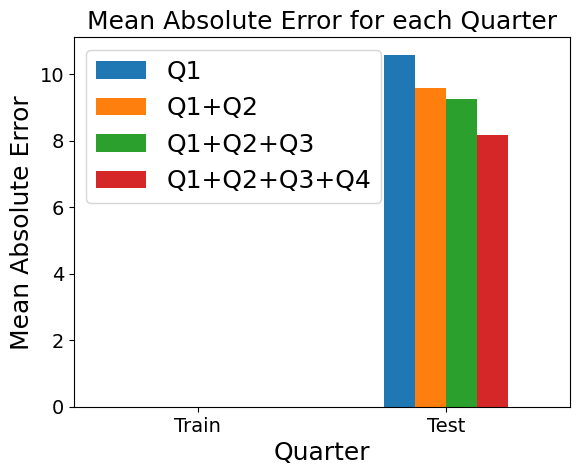

In [135]:
# print a histogram of the MAE train/test for each Quarter of a default model
q1_dt = DecisionTreeRegressor()
q1_dt.fit(X_q1_train, y_q1_train)
q1_q2_dt = DecisionTreeRegressor()
q1_q2_dt.fit(X_q1_q2_train, y_q1_q2_train)
q1_q2_q3_dt = DecisionTreeRegressor()
q1_q2_q3_dt.fit(X_q1_q2_q3_train, y_q1_q2_q3_train)
q1_q2_q3_q4_dt = DecisionTreeRegressor()
q1_q2_q3_q4_dt.fit(X_q1_q2_q3_q4_train, y_q1_q2_q3_q4_train)
mae_train_q1 = mean_absolute_error(y_q1_train, q1_dt.predict(X_q1_train))
mae_test_q1 = mean_absolute_error(y_q1_test, q1_dt.predict(X_q1_test))
mae_train_q1_q2 = mean_absolute_error(y_q1_q2_train, q1_q2_dt.predict(X_q1_q2_train))
mae_test_q1_q2 = mean_absolute_error(y_q1_q2_test, q1_q2_dt.predict(X_q1_q2_test))
mae_train_q1_q2_q3 = mean_absolute_error(y_q1_q2_q3_train, q1_q2_q3_dt.predict(X_q1_q2_q3_train))
mae_test_q1_q2_q3 = mean_absolute_error(y_q1_q2_q3_test, q1_q2_q3_dt.predict(X_q1_q2_q3_test))
mae_train_q1_q2_q3_q4 = mean_absolute_error(y_q1_q2_q3_q4_train, q1_q2_q3_q4_dt.predict(X_q1_q2_q3_q4_train))
mae_test_q1_q2_q3_q4 = mean_absolute_error(y_q1_q2_q3_q4_test, q1_q2_q3_q4_dt.predict(X_q1_q2_q3_q4_test))
baseline_mae = {
    "Q1": {"Train": mae_train_q1, "Test": mae_test_q1},
    "Q1+Q2": {"Train": mae_train_q1_q2, "Test": mae_test_q1_q2},
    "Q1+Q2+Q3": {"Train": mae_train_q1_q2_q3, "Test": mae_test_q1_q2_q3},
    "Q1+Q2+Q3+Q4": {"Train": mae_train_q1_q2_q3_q4, "Test": mae_test_q1_q2_q3_q4}
}
baseline_mae_df = pd.DataFrame(baseline_mae)
print(baseline_mae_df)
# plot a barplot with the train/test MAE for each quarter
baseline_mae_df.plot(kind='bar')
plt.xlabel("Quarter", fontsize=18)
plt.ylabel("Mean Absolute Error", fontsize=18)
plt.title("Mean Absolute Error for each Quarter", fontsize=18)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=18)
plt.show()

### Baseline Analysis

Given only default hyperparameters, our models are all SEVERELY overfitting to the training data. You can see here that in every case, the model gets a perfect R^2 of 1.0 and MAE of 0.0 on the training set while performing exceptionally bad on the test sets.

The severe overfitting can probably be largely combatted through limiting DT depth which I will explore in the following cells

In [102]:
potential_max_depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
results = []
for max_depth in potential_max_depths:
    results.append(run_experiment(max_depth=max_depth, verbose=False))

# find the max depth with the best overall test scores
best_max_depth_r2 = {"Q1": None,
                     "Q1+Q2": None,
                     "Q1+Q2+Q3": None,
                     "Q1+Q2+Q3+Q4": None}
best_max_depth_mae = {"Q1": None,
                     "Q1+Q2": None,
                     "Q1+Q2+Q3": None,
                     "Q1+Q2+Q3+Q4": None}
best_score = {"Q1": None,
                     "Q1+Q2": None,
                     "Q1+Q2+Q3": None,
                     "Q1+Q2+Q3+Q4": None}
best_mae = {"Q1": None,
                     "Q1+Q2": None,
                     "Q1+Q2+Q3": None,
                     "Q1+Q2+Q3+Q4": None}
for i, result in enumerate(results):
    for key, (r2, mae) in result.items():
        if best_score[key] is None or r2 > best_score[key]:
            best_score[key] = r2
            best_max_depth_r2[key] = potential_max_depths[i]
        if best_mae[key] is None or mae < best_mae[key]:
            best_mae[key] = mae
            best_max_depth_mae[key] = potential_max_depths[i]

In [103]:
print("Best Max Depth by R^2")
print(best_max_depth_r2)
print(best_score)
print()
print("Best Max Depth by MAE")
print(best_max_depth_mae)
print(best_mae)

Best Max Depth by R^2
{'Q1': 3, 'Q1+Q2': 4, 'Q1+Q2+Q3': 5, 'Q1+Q2+Q3+Q4': 4}
{'Q1': 0.11289285344450128, 'Q1+Q2': 0.2803942649588377, 'Q1+Q2+Q3': 0.36941216072062877, 'Q1+Q2+Q3+Q4': 0.2862755509314583}

Best Max Depth by MAE
{'Q1': 3, 'Q1+Q2': 4, 'Q1+Q2+Q3': 5, 'Q1+Q2+Q3+Q4': 4}
{'Q1': np.float64(7.42746847273863), 'Q1+Q2': np.float64(7.050199897010517), 'Q1+Q2+Q3': np.float64(6.7400710552889), 'Q1+Q2+Q3+Q4': np.float64(6.787768878037563)}


### Interpretation

We see here that given different quarter information, we get different best max_depths for test MAE/R2. It looks like early in the game (q1) it is best not to make too many splits. This makes sense, because there is a lot of variability later in the game, and if we fit too closely to the training set, we will almost certainly do poorly when generalizing.

We see that there was a dramatic improvement in the  model's ability to predict the final score after q1 with the R^2 improving from -0.899 (much worse than just choosing the mean) to 0.138 and MAE from 11.3 to 7.4 points. This means that our model can predict the final score within roughly 1 touch down after only the first quarter of play! Also note that even given Q1,2,3, and 4 stats, the model still has an average error of nearly 7 points which suggests that when using the stats that we are using, even knowing the outcome of the entire game hardly improves the model's ability to predict the score.

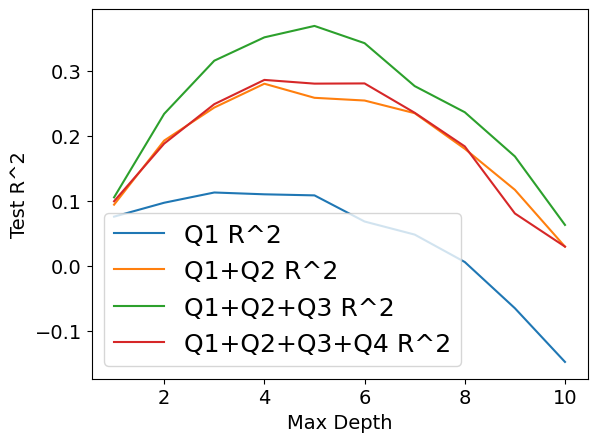

In [115]:
# graph r^2 and mae for each max depth
q1_r2 = [result["Q1"][0] for result in results]
q1_mae = [result["Q1"][1] for result in results]
q1_q2_r2 = [result["Q1+Q2"][0] for result in results]
q1_q2_mae = [result["Q1+Q2"][1] for result in results]
q1_q2_q3_r2 = [result["Q1+Q2+Q3"][0] for result in results]
q1_q2_q3_mae = [result["Q1+Q2+Q3"][1] for result in results]
q1_q2_q3_q4_r2 = [result["Q1+Q2+Q3+Q4"][0] for result in results]
q1_q2_q3_q4_mae = [result["Q1+Q2+Q3+Q4"][1] for result in results]

plt.plot(potential_max_depths, q1_r2, label="Q1 R^2")
plt.plot(potential_max_depths, q1_q2_r2, label="Q1+Q2 R^2")
plt.plot(potential_max_depths, q1_q2_q3_r2, label="Q1+Q2+Q3 R^2")
plt.plot(potential_max_depths, q1_q2_q3_q4_r2, label="Q1+Q2+Q3+Q4 R^2")
plt.xlabel("Max Depth", fontsize=14)
plt.ylabel("Test R^2", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=18)

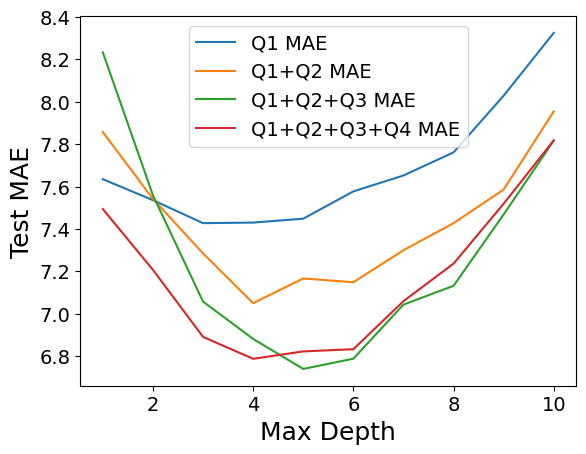

In [113]:
plt.figure()
plt.plot(potential_max_depths, q1_mae, label="Q1 MAE")
plt.plot(potential_max_depths, q1_q2_mae, label="Q1+Q2 MAE")
plt.plot(potential_max_depths, q1_q2_q3_mae, label="Q1+Q2+Q3 MAE")
plt.plot(potential_max_depths, q1_q2_q3_q4_mae, label="Q1+Q2+Q3+Q4 MAE")
plt.xlabel("Max Depth", fontsize=18)  # Increase label font size
plt.ylabel("Test MAE", fontsize=18)  # Increase label font size
plt.legend(fontsize=14)  # Increase legend font size
plt.xticks(fontsize=14)  # Increase x-axis font size
plt.yticks(fontsize=14)  # Increase y-axis font size
plt.show()


In [106]:
# using the best max depth for each model, test with different other hyperparameters
best_max_depth_q1 = best_max_depth_r2["Q1"]
best_max_depth_q1_q2 = best_max_depth_r2["Q1+Q2"]
best_max_depth_q1_q2_q3 = best_max_depth_r2["Q1+Q2+Q3"]
best_max_depth_q1_q2_q3_q4 = best_max_depth_r2["Q1+Q2+Q3+Q4"]
criteria = ['squared_error', 'poisson', 'absolute_error', 'friedman_mse']
r2_scores = {}
mae_scores = {}
for criterion in criteria:  
    dt_q1 = DecisionTreeRegressor(max_depth=best_max_depth_q1, criterion=criterion)
    dt_q1.fit(X_q1_train, y_q1_train)
    dt_q1_q2 = DecisionTreeRegressor(max_depth=best_max_depth_q1_q2, criterion=criterion)
    dt_q1_q2.fit(X_q1_q2_train, y_q1_q2_train)
    dt_q1_q2_q3 = DecisionTreeRegressor(max_depth=best_max_depth_q1_q2_q3, criterion=criterion)
    dt_q1_q2_q3.fit(X_q1_q2_q3_train, y_q1_q2_q3_train)
    dt_q1_q2_q3_q4 = DecisionTreeRegressor(max_depth=best_max_depth_q1_q2_q3_q4, criterion=criterion)
    dt_q1_q2_q3_q4.fit(X_q1_q2_q3_q4_train, y_q1_q2_q3_q4_train)
    r2_scores[criterion] = {
        "Q1": dt_q1.score(X_q1_test, y_q1_test),
        "Q1+Q2": dt_q1_q2.score(X_q1_q2_test, y_q1_q2_test),
        "Q1+Q2+Q3": dt_q1_q2_q3.score(X_q1_q2_q3_test, y_q1_q2_q3_test),
        "Q1+Q2+Q3+Q4": dt_q1_q2_q3_q4.score(X_q1_q2_q3_q4_test, y_q1_q2_q3_q4_test)
    }
    mae_scores[criterion] = {
        "Q1": mean_absolute_error(y_q1_test, dt_q1.predict(X_q1_test)),
        "Q1+Q2": mean_absolute_error(y_q1_q2_test, dt_q1_q2.predict(X_q1_q2_test)),
        "Q1+Q2+Q3": mean_absolute_error(y_q1_q2_q3_test, dt_q1_q2_q3.predict(X_q1_q2_q3_test)),
        "Q1+Q2+Q3+Q4": mean_absolute_error(y_q1_q2_q3_q4_test, dt_q1_q2_q3_q4.predict(X_q1_q2_q3_q4_test)
    )}

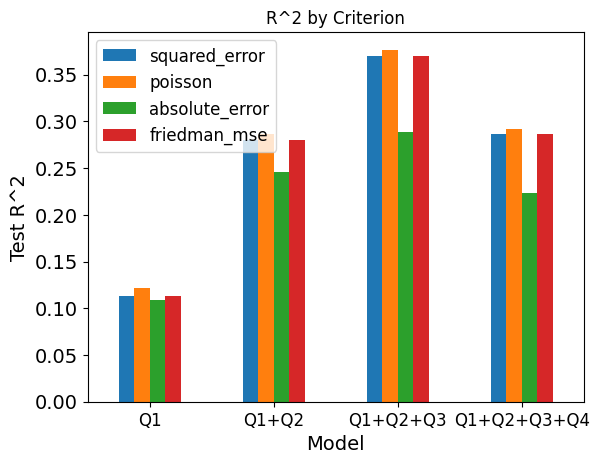

In [120]:
# plot r^2 and mae for each criterion
r2_df = pd.DataFrame(r2_scores)
mae_df = pd.DataFrame(mae_scores)
r2_df.plot(kind='bar')
plt.title("R^2 by Criterion")
plt.ylabel("Test R^2", fontsize=14)
plt.xlabel("Model", fontsize=14)
plt.xticks(np.arange(4), ["Q1", "Q1+Q2", "Q1+Q2+Q3", "Q1+Q2+Q3+Q4"], rotation=0, fontsize=12)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)
plt.show()

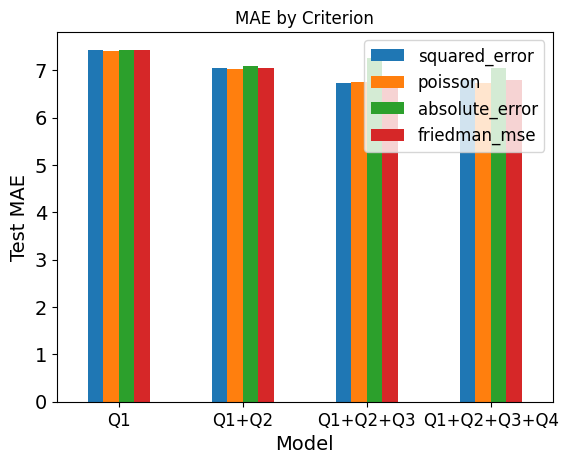

In [121]:
# graph mae for each criterion
mae_df.plot(kind='bar')
plt.title("MAE by Criterion")
plt.ylabel("Test MAE", fontsize=14)
plt.xlabel("Model", fontsize=14)
plt.xticks(np.arange(4), ["Q1", "Q1+Q2", "Q1+Q2+Q3", "Q1+Q2+Q3+Q4"], rotation=0, fontsize=12)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)
plt.show()


In [109]:
r2_scores['squared_error']

{'Q1': 0.11289285344450128,
 'Q1+Q2': 0.2803942649588377,
 'Q1+Q2+Q3': 0.36941216072062877,
 'Q1+Q2+Q3+Q4': 0.2862755509314583}

In [110]:
# print the best criterion for each model q1, q2, q3, q4. should be tuple of (score, criterion)
best_criterion_r2 = {}
best_criterion_mae = {}
for key in r2_scores.keys():
    max_score_q1 = max(r2_scores['squared_error']["Q1"], r2_scores['poisson']["Q1"], r2_scores['absolute_error']["Q1"], r2_scores['friedman_mse']["Q1"])
    max_criteria_q1 = [criterion for criterion in r2_scores.keys() if r2_scores[criterion]["Q1"] == max_score_q1]
    best_criterion_r2["Q1"] = (max_score_q1, max_criteria_q1)
    max_score_q1_q2 = max(r2_scores['squared_error']["Q1+Q2"], r2_scores['poisson']["Q1+Q2"], r2_scores['absolute_error']["Q1+Q2"], r2_scores['friedman_mse']["Q1+Q2"])
    max_criteria_q1_q2 = [criterion for criterion in r2_scores.keys() if r2_scores[criterion]["Q1+Q2"] == max_score_q1_q2]
    best_criterion_r2["Q1+Q2"] = (max_score_q1_q2, max_criteria_q1_q2)
    max_score_q1_q2_q3 = max(r2_scores['squared_error']["Q1+Q2+Q3"], r2_scores['poisson']["Q1+Q2+Q3"], r2_scores['absolute_error']["Q1+Q2+Q3"], r2_scores['friedman_mse']["Q1+Q2+Q3"])
    max_criteria_q1_q2_q3 = [criterion for criterion in r2_scores.keys() if r2_scores[criterion]["Q1+Q2+Q3"] == max_score_q1_q2_q3]
    best_criterion_r2["Q1+Q2+Q3"] = (max_score_q1_q2_q3, max_criteria_q1_q2_q3)
    max_score_q1_q2_q3_q4 = max(r2_scores['squared_error']["Q1+Q2+Q3+Q4"], r2_scores['poisson']["Q1+Q2+Q3+Q4"], r2_scores['absolute_error']["Q1+Q2+Q3+Q4"], r2_scores['friedman_mse']["Q1+Q2+Q3+Q4"])
    max_criteria_q1_q2_q3_q4 = [criterion for criterion in r2_scores.keys() if r2_scores[criterion]["Q1+Q2+Q3+Q4"] == max_score_q1_q2_q3_q4]
    best_criterion_r2["Q1+Q2+Q3+Q4"] = (max_score_q1_q2_q3_q4, max_criteria_q1_q2_q3_q4)

    min_mae_q1 = min(mae_scores['squared_error']["Q1"], mae_scores['poisson']["Q1"], mae_scores['absolute_error']["Q1"], mae_scores['friedman_mse']["Q1"])
    min_criteria_q1 = [criterion for criterion in mae_scores.keys() if mae_scores[criterion]["Q1"] == min_mae_q1]
    best_criterion_mae["Q1"] = (min_mae_q1, min_criteria_q1)
    min_mae_q1_q2 = min(mae_scores['squared_error']["Q1+Q2"], mae_scores['poisson']["Q1+Q2"], mae_scores['absolute_error']["Q1+Q2"], mae_scores['friedman_mse']["Q1+Q2"])
    min_criteria_q1_q2 = [criterion for criterion in mae_scores.keys() if mae_scores[criterion]["Q1+Q2"] == min_mae_q1_q2]
    best_criterion_mae["Q1+Q2"] = (min_mae_q1_q2, min_criteria_q1_q2)
    min_mae_q1_q2_q3 = min(mae_scores['squared_error']["Q1+Q2+Q3"], mae_scores['poisson']["Q1+Q2+Q3"], mae_scores['absolute_error']["Q1+Q2+Q3"], mae_scores['friedman_mse']["Q1+Q2+Q3"])
    min_criteria_q1_q2_q3 = [criterion for criterion in mae_scores.keys() if mae_scores[criterion]["Q1+Q2+Q3"] == min_mae_q1_q2_q3]
    best_criterion_mae["Q1+Q2+Q3"] = (min_mae_q1_q2_q3, min_criteria_q1_q2_q3)
    min_mae_q1_q2_q3_q4 = min(mae_scores['squared_error']["Q1+Q2+Q3+Q4"], mae_scores['poisson']["Q1+Q2+Q3+Q4"], mae_scores['absolute_error']["Q1+Q2+Q3+Q4"], mae_scores['friedman_mse']["Q1+Q2+Q3+Q4"])
    min_criteria_q1_q2_q3_q4 = [criterion for criterion in mae_scores.keys() if mae_scores[criterion]["Q1+Q2+Q3+Q4"] == min_mae_q1_q2_q3_q4]
    best_criterion_mae["Q1+Q2+Q3+Q4"] = (min_mae_q1_q2_q3_q4, min_criteria_q1_q2_q3_q4)


print("Best Criterion by R^2")
print(best_criterion_r2)
print()
print("Best Criterion by MAE")
print(best_criterion_mae)


Best Criterion by R^2
{'Q1': (0.12146928765731202, ['poisson']), 'Q1+Q2': (0.28697366524253076, ['poisson']), 'Q1+Q2+Q3': (0.37661945468206026, ['poisson']), 'Q1+Q2+Q3+Q4': (0.2917797893207261, ['poisson'])}

Best Criterion by MAE
{'Q1': (np.float64(7.408036533399301), ['poisson']), 'Q1+Q2': (np.float64(7.034454730577949), ['poisson']), 'Q1+Q2+Q3': (np.float64(6.7400710552889), ['squared_error', 'friedman_mse']), 'Q1+Q2+Q3+Q4': (np.float64(6.727745328561593), ['poisson'])}


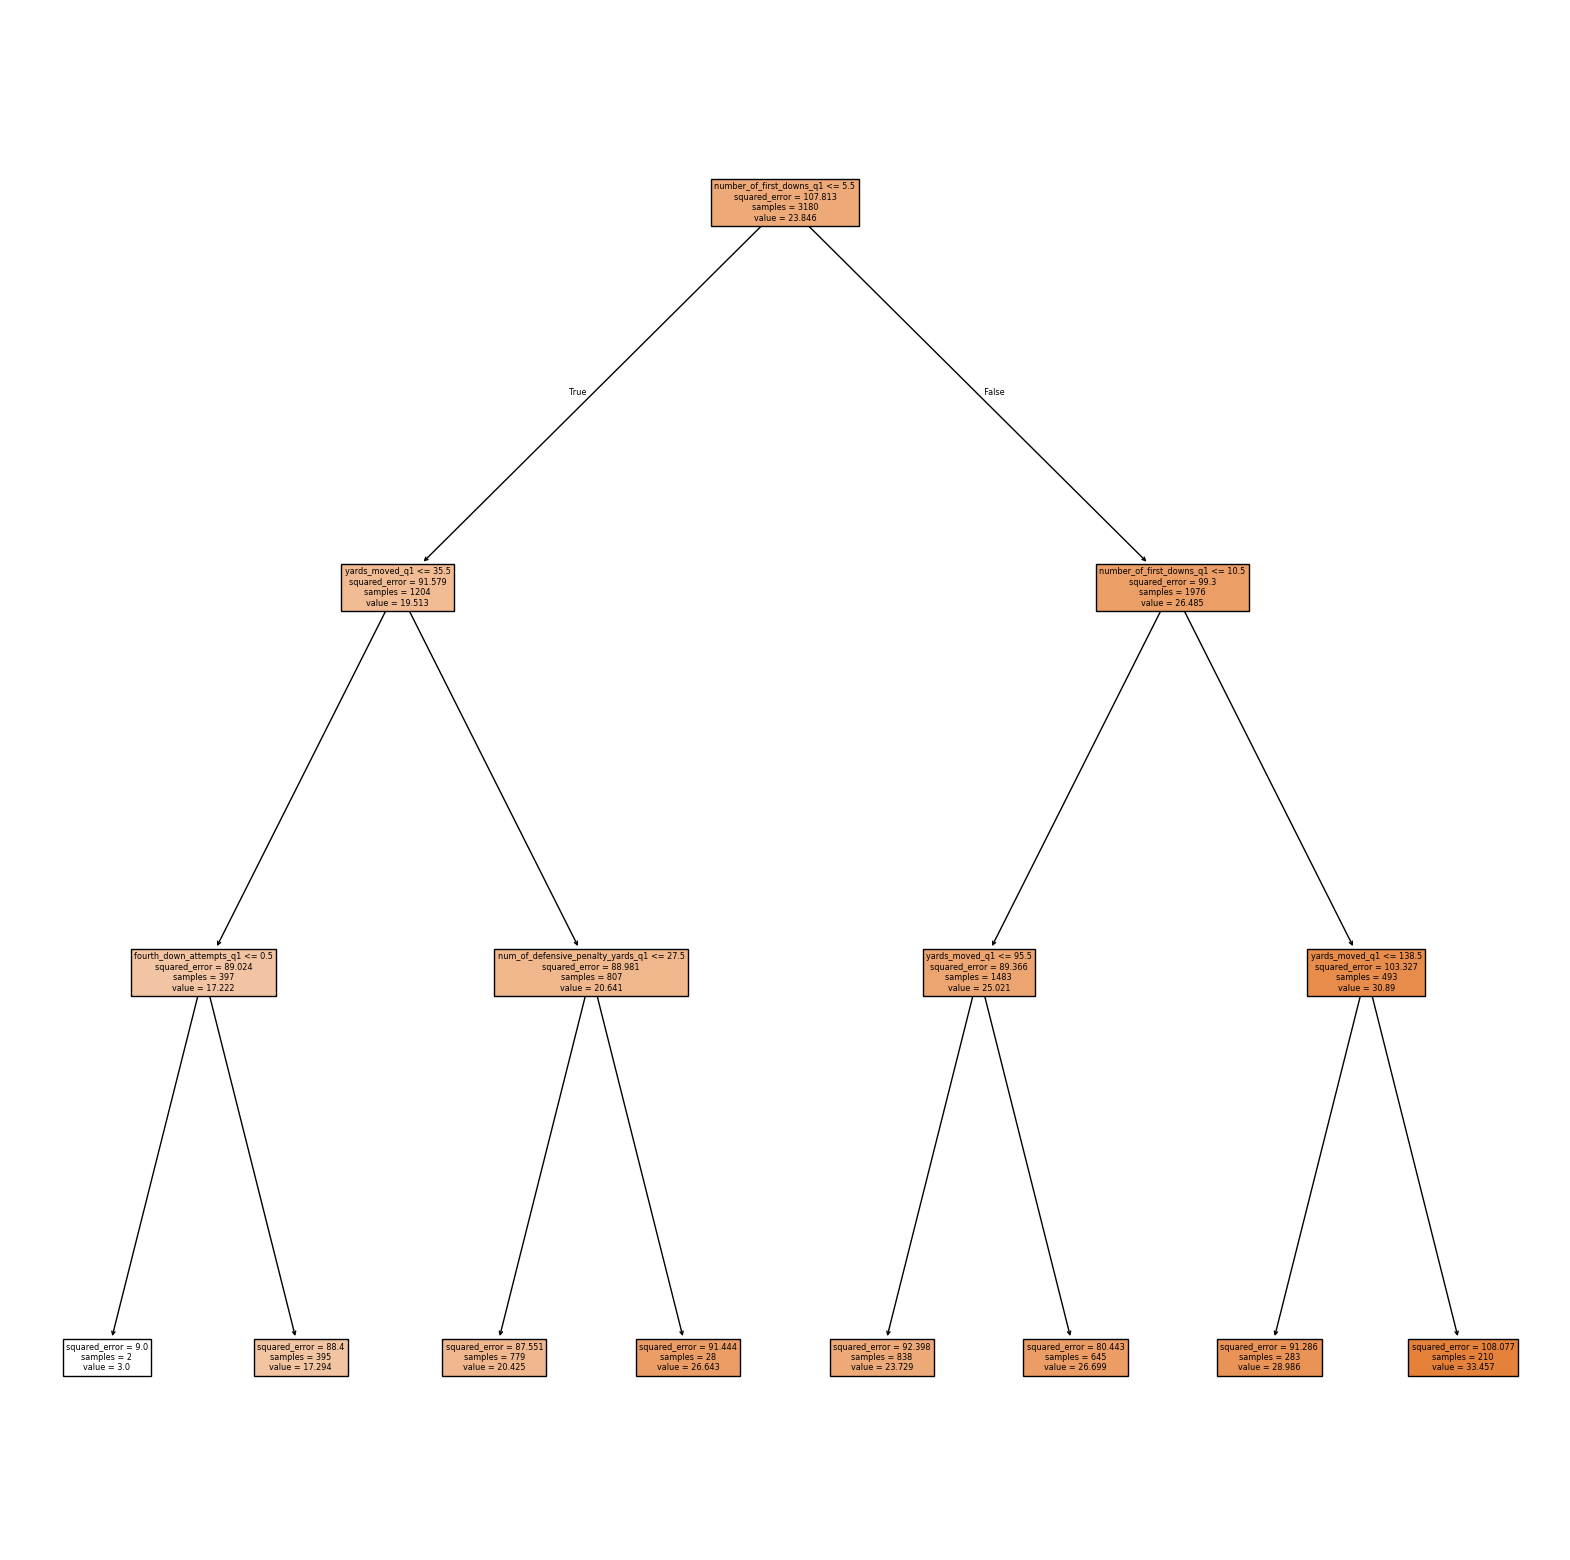

In [111]:
best_model = DecisionTreeRegressor(max_depth=best_max_depth_q1, criterion='squared_error')
best_model.fit(X_q1_train, y_q1_train)
# interpret the splits
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 20))
plot_tree(best_model, feature_names=X_q1_train.columns, filled=True)
plt.show()